In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,Input
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
dataset_path = "C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits"

images = []
labels = []

for digit in range(10):
    folder_path = os.path.join("C:\\Users\\ASLAM\\Desktop\\Bootcamp\\Day6\\digits", str(digit))  
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipping corrupt image: {img_path}")
            continue
        
        img = cv2.resize(img, (28, 28))  
        img = img / 255.0  
        images.append(img)
        labels.append(digit)

X = np.array(images).reshape(-1, 28, 28, 1)  
y = to_categorical(labels, num_classes=10) 

print("Dataset Shape:", X.shape)  


Dataset Shape: (10160, 28, 28, 1)


In [52]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    MaxPooling2D((2,2)),  
    Conv2D(64, (3,3), activation='relu'),  
    MaxPooling2D((2,2)),  
    Flatten(),  
    Dense(128, activation='relu'),  
    Dropout(0.3),  
    Dense(10, activation='softmax')  
])

In [54]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [55]:
datagen = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    zoom_range=0.1  
)
datagen.fit(X_train)

In [56]:

history=model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.3378 - loss: 2.1072 - val_accuracy: 0.8844 - val_loss: 0.8514
Epoch 2/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8395 - loss: 0.7245 - val_accuracy: 0.9360 - val_loss: 0.2733
Epoch 3/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9122 - loss: 0.3420 - val_accuracy: 0.9572 - val_loss: 0.1716
Epoch 4/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9324 - loss: 0.2399 - val_accuracy: 0.9651 - val_loss: 0.1327
Epoch 5/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9514 - loss: 0.1861 - val_accuracy: 0.9685 - val_loss: 0.1094
Epoch 6/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9558 - loss: 0.1568 - val_accuracy: 0.9724 - val_loss: 0.0971
Epoch 7/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9624 - loss: 0.1263 - val_accuracy: 0.9803 - val_loss: 0.0779
Epoch 8/20
254/254 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9675 - loss: 0.1067 - val_accu

In [ ]:

initial_weights = model.layers[0].get_weights()[0]  

final_weights = model.layers[0].get_weights()[0]

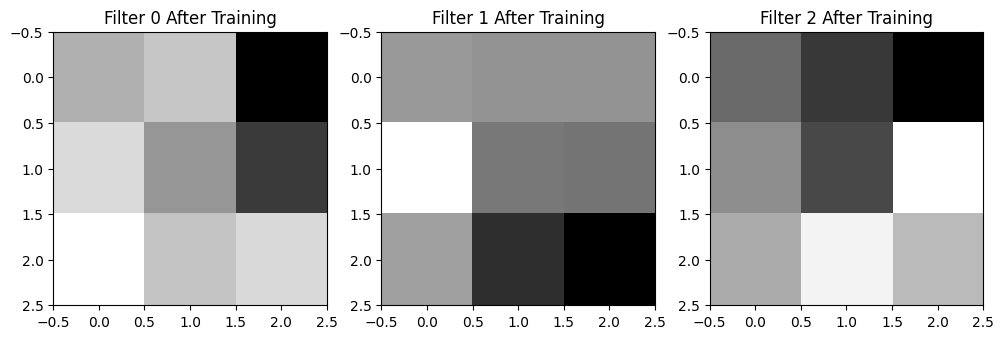

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    axes[i].imshow(final_weights[:, :, 0, i], cmap='gray')
    axes[i].set_title(f"Filter {i} After Training")
plt.show()


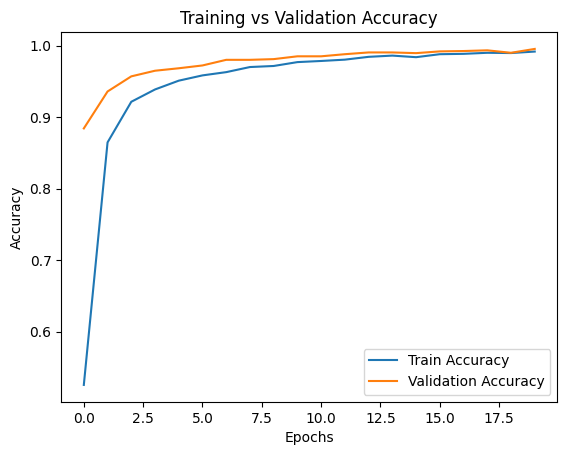

In [ ]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()



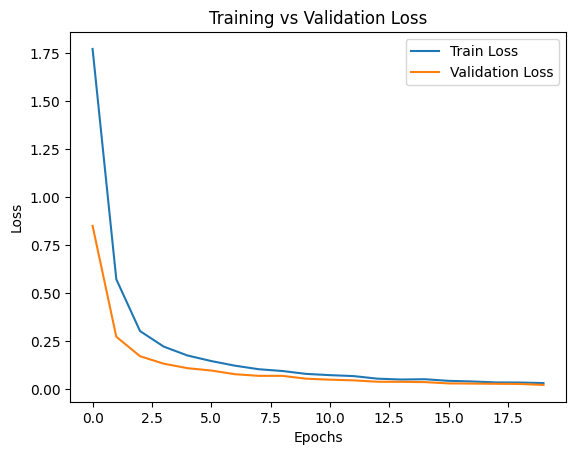

In [ ]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()
